In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, expected_returns, risk_models
import warnings
import yfinance as yf

start_date = '2006-01-01'
end_date = '2021-12-31'

# Optionally disable warnings (use cautiously)
warnings.filterwarnings("ignore")

# === Configuration ===
data_path = '/Users/benjaminli/Code/MyTradingProjects/DRL_Portfolio_Optimisation/DRL-Portfolio-Optimisation/data'
sector_etfs = ['XLE', 'XLF', 'XLK', 'XLI', 'XLV', 'XLY', 'XLP', 'XLU', 'XLRE', 'XLB', 'XLC']
benchmark = 'SPY'
tickers_to_load = sector_etfs + [benchmark]

# can't get data_path to work


ohlc = yf.download(tickers_to_load, start=start_date, end=end_date, auto_adjust=False)

prices = ohlc["Adj Close"].dropna(how="all")
prices



[*********************100%***********************]  12 of 12 completed


Ticker,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,
2006-01-03,88.224983,20.255627,NaN,30.129412,17.763966,21.745028,16.536196,14.134382,NaN,16.358212,23.101503,25.836199
2006-01-04,88.642746,20.380098,NaN,30.215166,17.747421,21.800022,16.730200,14.182618,NaN,16.383774,23.331720,25.859680
2006-01-05,88.698486,20.347342,NaN,29.832123,17.808105,21.765646,16.807795,14.110261,NaN,16.276421,23.274166,25.883167
2006-01-06,89.436562,20.563528,NaN,30.563910,17.912922,21.848146,17.071625,14.170562,NaN,16.450224,23.425253,26.094559
2006-01-09,89.666389,20.556971,NaN,30.529610,17.962570,22.026899,17.125954,14.236895,NaN,16.347994,23.533176,26.360752
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,449.026398,82.627800,75.593338,48.778648,36.604790,98.586281,168.333389,69.131439,44.710258,63.043247,132.295135,197.515900
2021-12-27,455.381042,83.872223,76.328850,49.844841,36.981960,99.629829,171.944504,69.866402,45.623806,63.350693,133.691223,199.440659
2021-12-28,455.008942,84.358765,76.290146,49.809299,37.000820,100.132629,171.049042,70.261414,45.820854,63.920349,133.339813,199.528107


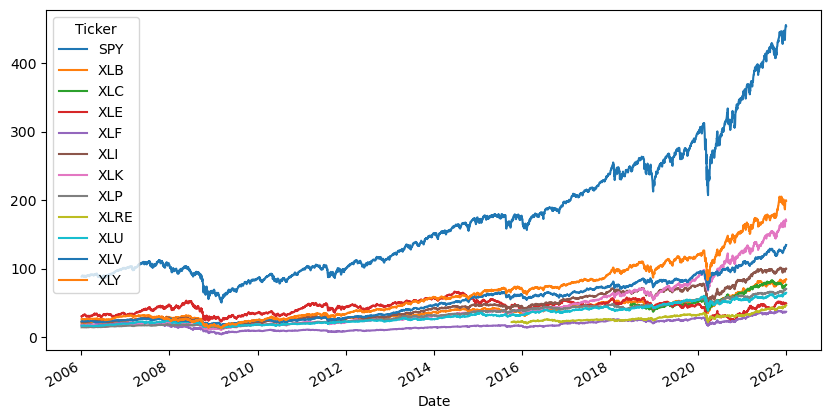

In [45]:
prices[(prices.index >= "2006-01-01") & (prices.index <= "2021-12-31")].plot(figsize=(10, 5));

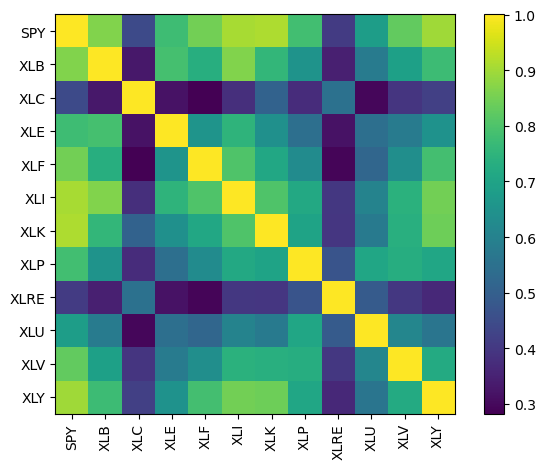

In [46]:
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);


In [50]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)

ef.max_sharpe()
weights = ef.clean_weights()

# Get the optimized portfolio weights as numbers
weights = ef.clean_weights()
print("Optimized Portfolio Weights (in numbers):")
for ticker, weight in weights.items():
    print(f"{ticker}: {weight:.4f}")

# Get performance stats: expected annual return, annual volatility, Sharpe ratio
rets, vol, sharpe = ef.portfolio_performance(verbose=False)

print("\nOptimized Portfolio Performance:")
print(f"Expected Annual Return: {rets*100:.2f}%")
print(f"Annual Volatility: {vol*100:.2f}%")
print(f"Sharpe Ratio: {sharpe:.2f}")


Optimized Portfolio Weights (in numbers):
SPY: 0.0000
XLB: 0.0167
XLC: 0.9175
XLE: 0.0000
XLF: 0.0475
XLI: 0.0000
XLK: 0.0000
XLP: 0.0000
XLRE: 0.0184
XLU: 0.0000
XLV: 0.0000
XLY: 0.0000

Optimized Portfolio Performance:
Expected Annual Return: 11.96%
Annual Volatility: 10.94%
Sharpe Ratio: 1.09


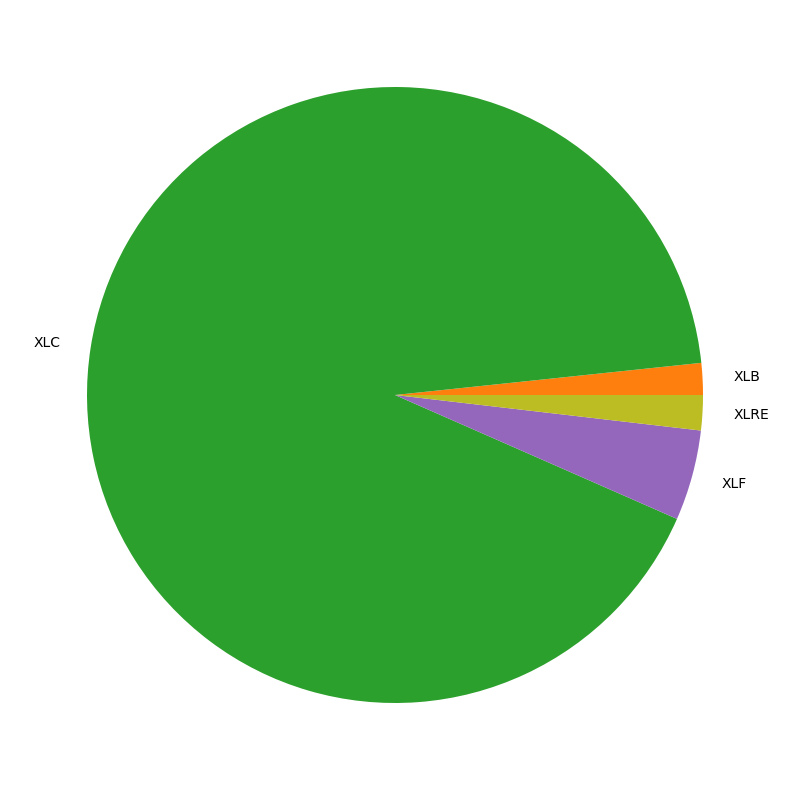

In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));

[*********************100%***********************]  12 of 12 completed


Error on 2018-06-20 00:00:00: Workspace allocation error!ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.



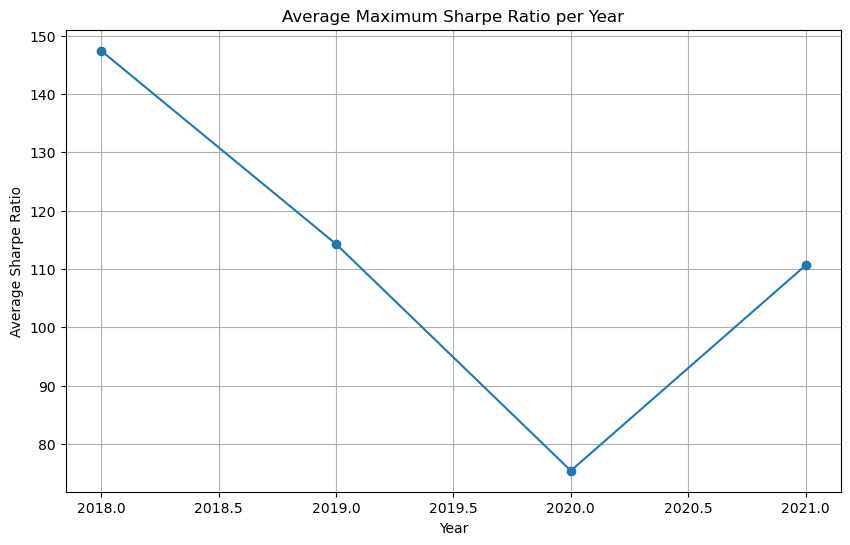

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, expected_returns, risk_models
import yfinance as yf
import warnings

# Optionally disable warnings
warnings.filterwarnings("ignore")

# === Configuration ===
start_date = '2006-01-01'
end_date = '2021-12-31'
sector_etfs = ['XLE', 'XLF', 'XLK', 'XLI', 'XLV', 'XLY', 'XLP', 'XLU', 'XLRE', 'XLB', 'XLC']
benchmark = 'SPY'
tickers_to_load = sector_etfs + [benchmark]

# Download historical data
ohlc = yf.download(tickers_to_load, start=start_date, end=end_date, auto_adjust=False)
prices = ohlc["Adj Close"].dropna(how="all")

# Set the lookback period (60 days)
lookback = 60

# Dictionary to store Sharpe ratio for each day
daily_sharpe = {}

# Loop over each day starting from the first day with at least 60 days of data
for current_date in prices.index[lookback:]:
    # Extract the last 'lookback' days of data up to the current_date
    window_prices = prices.loc[:current_date].iloc[-lookback:]
    
    # Ensure we have a complete window (this is mostly redundant)
    if len(window_prices) < lookback:
        continue
    
    try:
        # Calculate expected returns (using CAPM estimator)
        mu = expected_returns.capm_return(window_prices)
        
        # Estimate the covariance matrix using the Ledoit-Wolf method
        S = risk_models.CovarianceShrinkage(window_prices).ledoit_wolf()
        
        # Optimize for the portfolio with maximum Sharpe ratio
        ef = EfficientFrontier(mu, S)
        ef.max_sharpe(risk_free_rate=-10.0)
        
        # Obtain the performance metrics (return, volatility, Sharpe ratio)
        rets, vol, sharpe = ef.portfolio_performance(verbose=False)
        
        # Store the Sharpe ratio for the current date
        daily_sharpe[current_date] = sharpe
        
    except Exception as e:
        print(f"Error on {current_date}: {e}")

# Convert dictionary to a Pandas Series
daily_sharpe_series = pd.Series(daily_sharpe)
daily_sharpe_series.index = pd.to_datetime(daily_sharpe_series.index)
daily_sharpe_series = daily_sharpe_series.sort_index()

# Compute average Sharpe ratio for each year
annual_sharpe = daily_sharpe_series.resample('Y').mean()

# Plot the annual average Sharpe ratio as a line graph
plt.figure(figsize=(10, 6))
plt.plot(annual_sharpe.index.year, annual_sharpe.values, marker='o', linestyle='-')
plt.title("Average Maximum Sharpe Ratio per Year")
plt.xlabel("Year")
plt.ylabel("Average Sharpe Ratio")
plt.grid(True)
plt.show()
